## Students Exam Scores - Writing Scores

Dataset Source: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

#### Install Necessary Libraries

In [1]:
%pip install -U matplotlib
%pip install -U numpy
%pip install auto-sklearn seaborn sklearn imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Import Necessary Libraries

In [2]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.metrics import mean_absolute_error

import autosklearn
from autosklearn.regression import AutoSklearnRegressor

#### Show Library Versions

In [3]:
n = 18

print(f"Language/Library".rjust(n-2), '|', 'Version')
print('-' * (n-2), '|', '--------')
print("Python :".rjust(n), sys.version[0:6])
print("NumPy :".rjust(n), np.__version__)
print("Pandas :".rjust(n), pd.__version__)
print("Sklearn :".rjust(n), sklearn.__version__)
print("Seaborn :".rjust(n), sns.__version__)

Language/Library | Version
---------------- | --------
          Python : 3.10.1
           NumPy : 1.25.0
          Pandas : 1.5.3
         Sklearn : 0.24.2
         Seaborn : 0.12.2


### Initial Data Preprocessing

#### Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Ingest Dataset

In [5]:
col_names = ["Unnamed: 0",
             "gender",
             "ethnicity",
             "parent_edu",
             "lunch_type",
             "test_prep",
             "parent_marital_status",
             "practice_sport",
             "is_first_child",
             "sibling_count",
             "transportation_means",
             "weekly_study_hrs",
             "math_score",
             "reading_score",
             "writing_score"
             ]

data_types = {"Unnamed: 0": np.uint32,
              "gender": 'category',
              "ethnicity": 'category',
              "parent_edu": 'category',
              "lunch_type": 'category',
              "test_prep": 'category',
              "parent_marital_status": 'category',
              "practice_sport": 'category',
              "is_first_child": 'category',
              "sibling_count": np.float32,
              "transportation_means": 'category',
              "weekly_study_hrs": 'category',
              "math_score": np.uint8,
              "reading_score": np.uint8,
              "writing_score": np.uint8
              }

data = pd.read_csv("/content/drive/MyDrive/Student Performance/Expanded_data_with_more_features.csv",
                   names=col_names,
                   dtype=data_types,
                   engine='c',
                   header=0)

data = data.drop(columns=["Unnamed: 0"])

data.head()

,gender,ethnicity,parent_edu,lunch_type,test_prep,parent_marital_status,practice_sport,is_first_child,sibling_count,transportation_means,weekly_study_hrs,math_score,reading_score,writing_score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#### More Dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 30641 non-null  category
 1   ethnicity              28801 non-null  category
 2   parent_edu             28796 non-null  category
 3   lunch_type             30641 non-null  category
 4   test_prep              28811 non-null  category
 5   parent_marital_status  29451 non-null  category
 6   practice_sport         30010 non-null  category
 7   is_first_child         29737 non-null  category
 8   sibling_count          29069 non-null  float32 
 9   transportation_means   27507 non-null  category
 10  weekly_study_hrs       29686 non-null  category
 11  math_score             30641 non-null  uint8   
 12  reading_score          30641 non-null  uint8   
 13  writing_score          30641 non-null  uint8   
dtypes: category(10), float32(1), uint8(3)


### Visualizations

#### Create Function to Visualize Features (Barplot)

In [7]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.

    Output:
    - A Bar Plot.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."

    ax = feature_to_visualize.value_counts().sort_index().plot.bar(
                                                      figsize=(12,8),
                                                      rot=0,
                                                      legend=False,
                                                      color=["lightgreen",
                                                             "blue",
                                                             "brown",
                                                             "lightblue",
                                                             "tan",
                                                             "yellow",
                                                             "orange",
                                                             "green",
                                                             "red",
                                                             "purple"]
                                                      )

    ax.bar_label(ax.containers[0])

    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.show()

#### Dataset Visualization: Gender

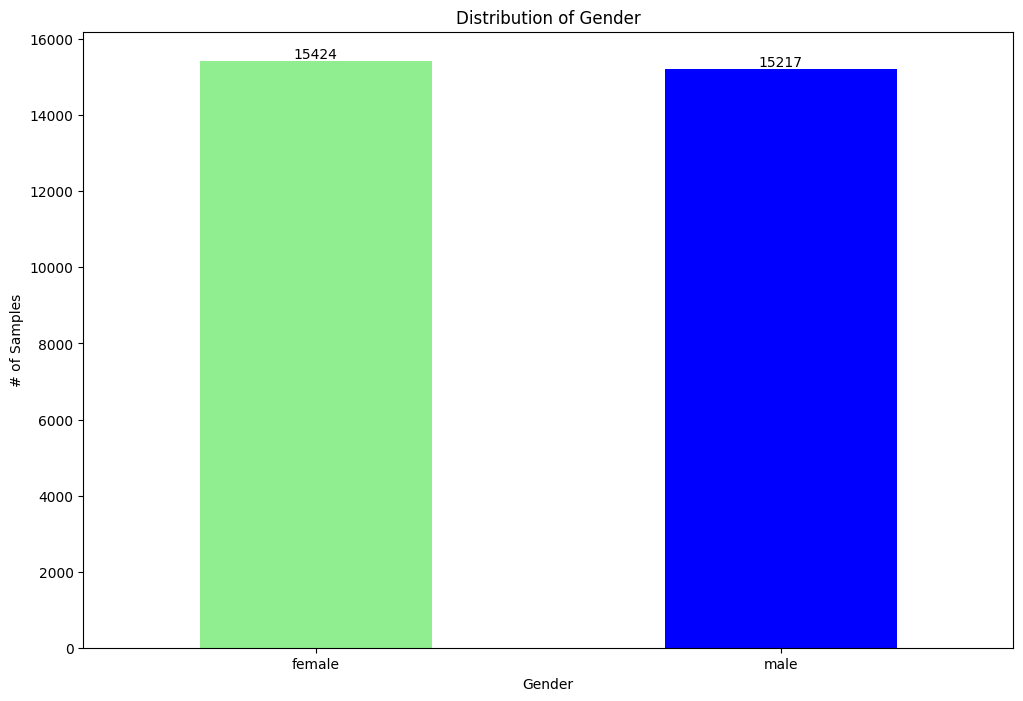

In [8]:
barplot_visual(data["gender"],
               "Distribution of Gender",
               "Gender",
               "# of Samples",
               )

#### Dataset Visualization: Ethnicity

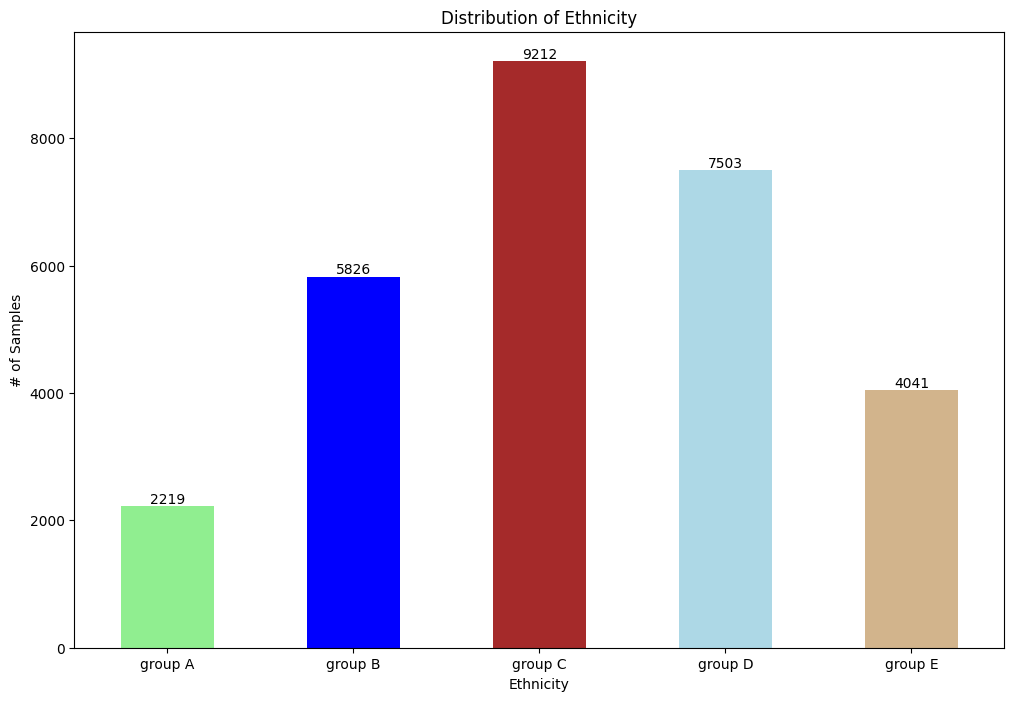

In [9]:
barplot_visual(data["ethnicity"],
               "Distribution of Ethnicity",
               "Ethnicity",
               "# of Samples",
               )

#### Dataset Visualization: Parent Education Level

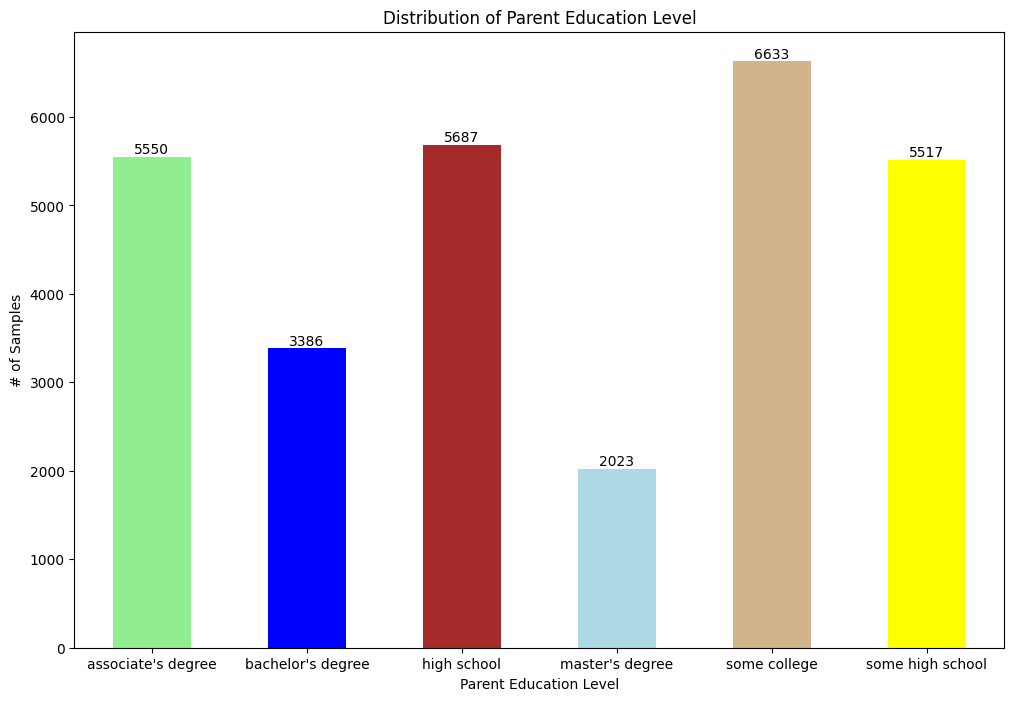

In [10]:
barplot_visual(data["parent_edu"],
               "Distribution of Parent Education Level",
               "Parent Education Level",
               "# of Samples",
               )

#### Dataset Visualization: Lunch Type

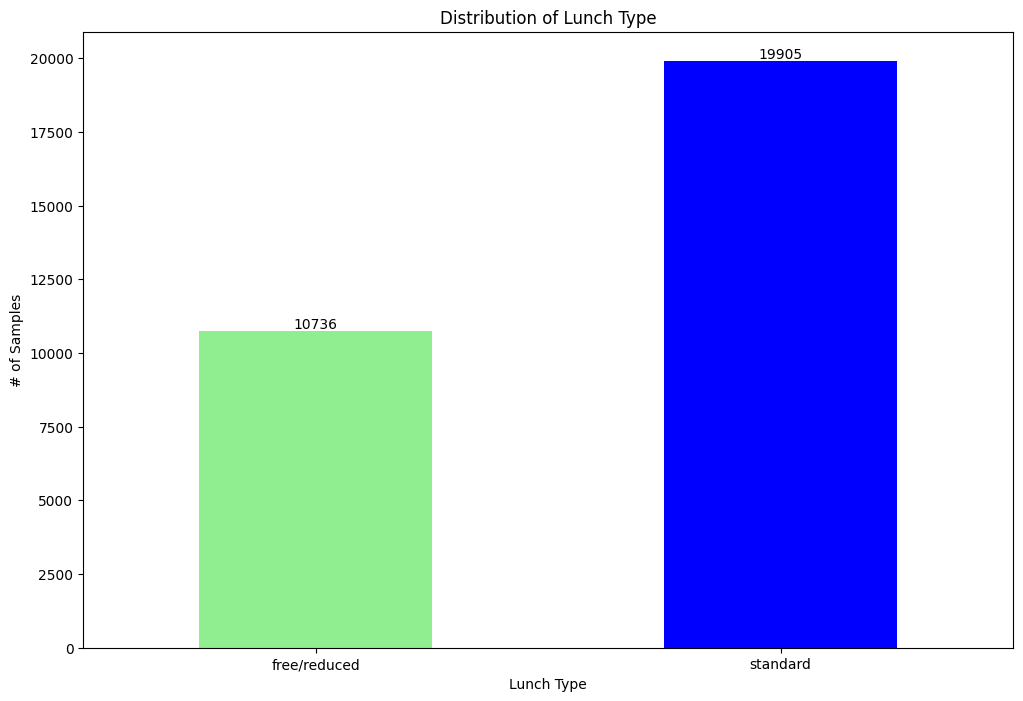

In [11]:
barplot_visual(data["lunch_type"],
               "Distribution of Lunch Type",
               "Lunch Type",
               "# of Samples",
               )

#### Dataset Visualization: Test Preparation Status

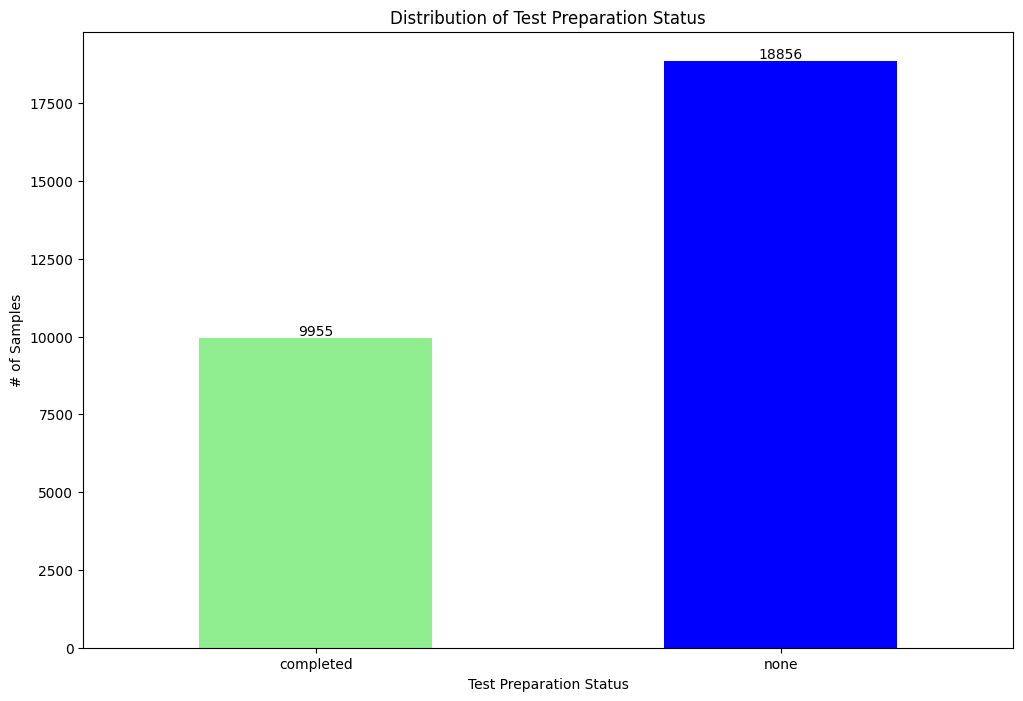

In [12]:
barplot_visual(data["test_prep"],
               "Distribution of Test Preparation Status",
               "Test Preparation Status",
               "# of Samples",
               )

#### Dataset Visualization: Parent's Marital Status

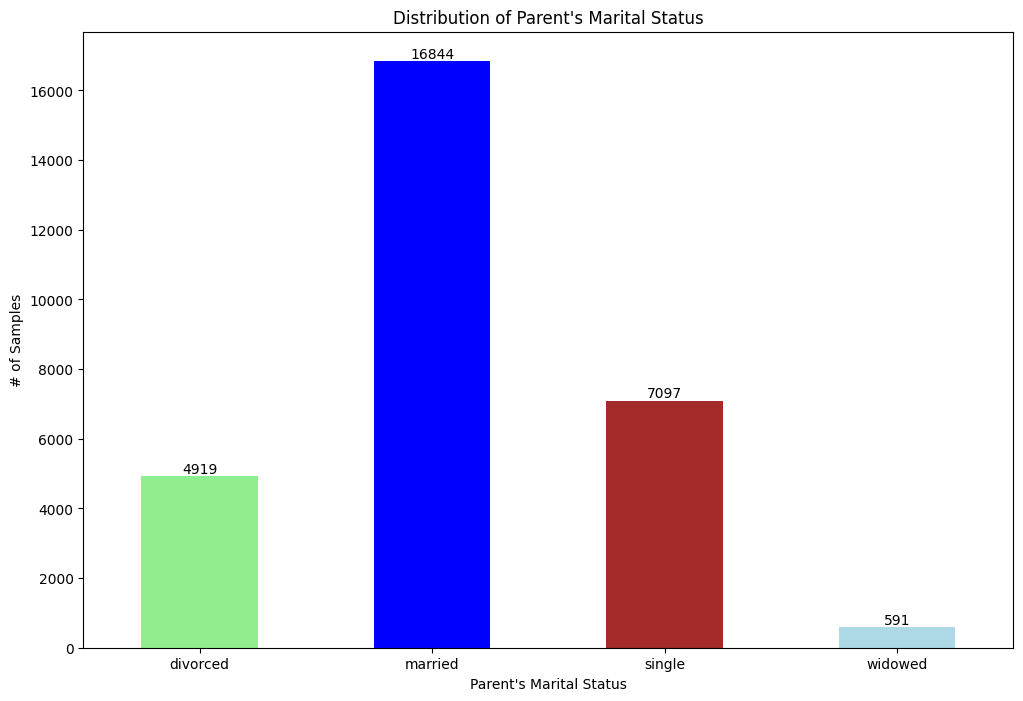

In [13]:
barplot_visual(data["parent_marital_status"],
               "Distribution of Parent's Marital Status",
               "Parent's Marital Status",
               "# of Samples",
               )

#### Dataset Visualization: Does Student Practice Sport(s)?

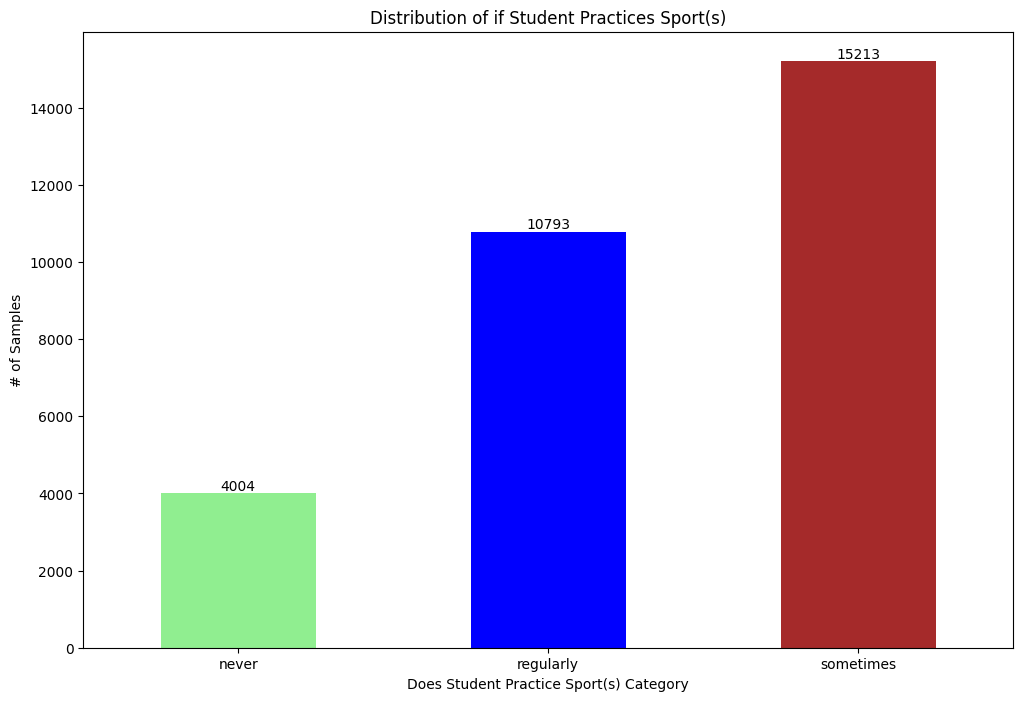

In [14]:
barplot_visual(data["practice_sport"],
               "Distribution of if Student Practices Sport(s)",
               "Does Student Practice Sport(s) Category",
               "# of Samples",
               )

#### Dataset Visualization: Is Student First Born Child?

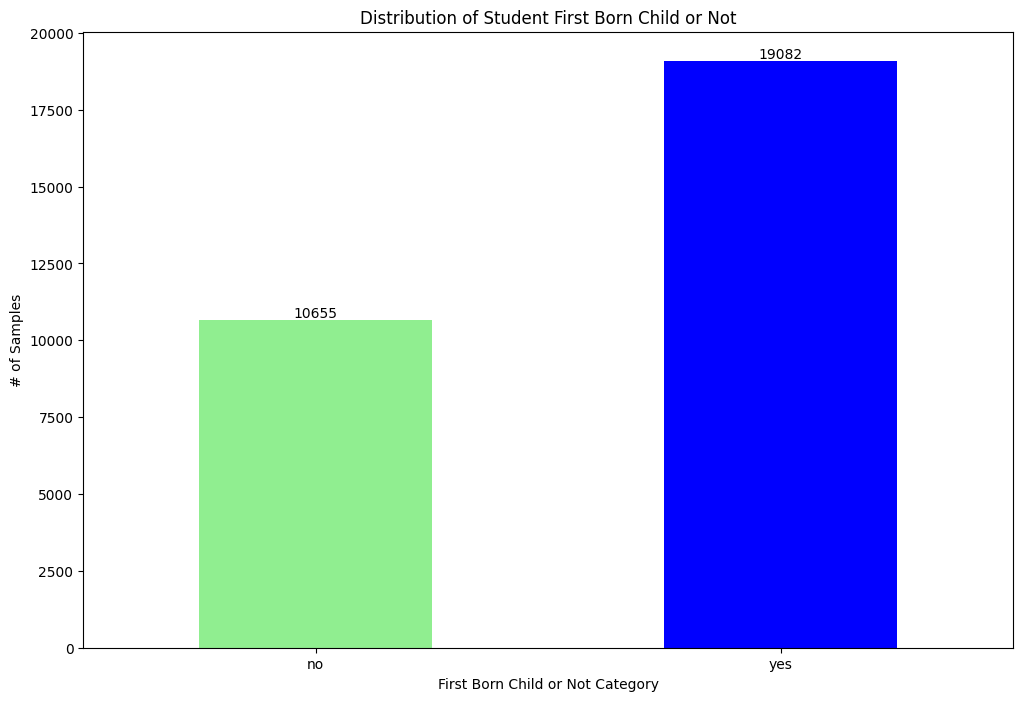

In [15]:
barplot_visual(data["is_first_child"],
               "Distribution of Student First Born Child or Not",
               "First Born Child or Not Category",
               "# of Samples",
               )

#### Dataset Visualization: Sibling Count

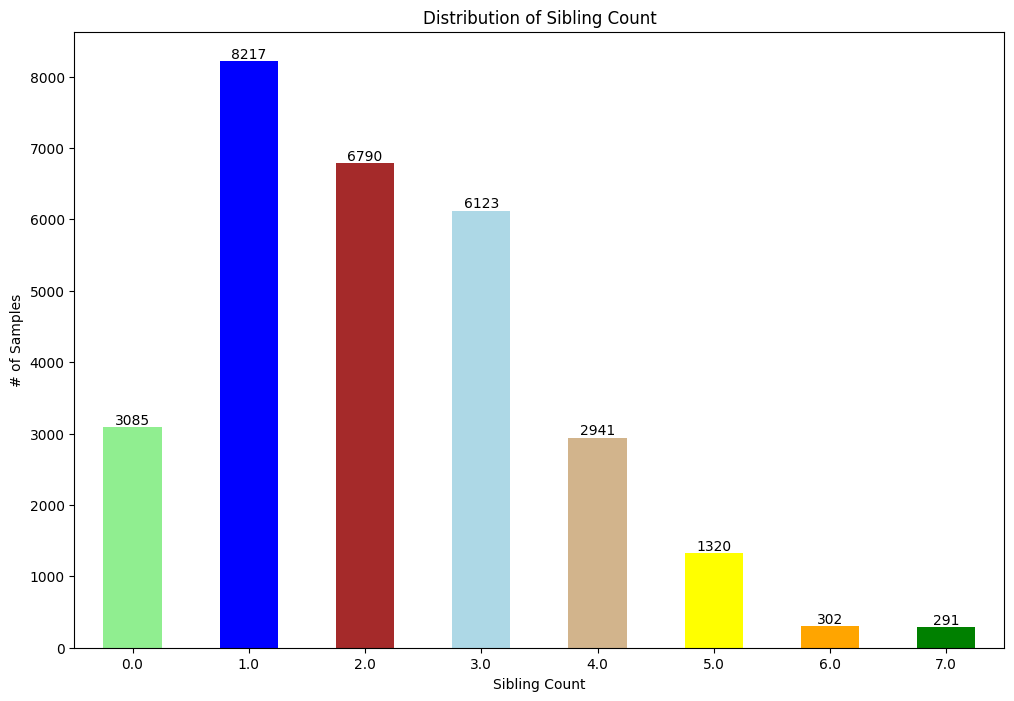

In [16]:
barplot_visual(data["sibling_count"],
               "Distribution of Sibling Count",
               "Sibling Count",
               "# of Samples",
               )

#### Dataset Visualization: Means of Transportation

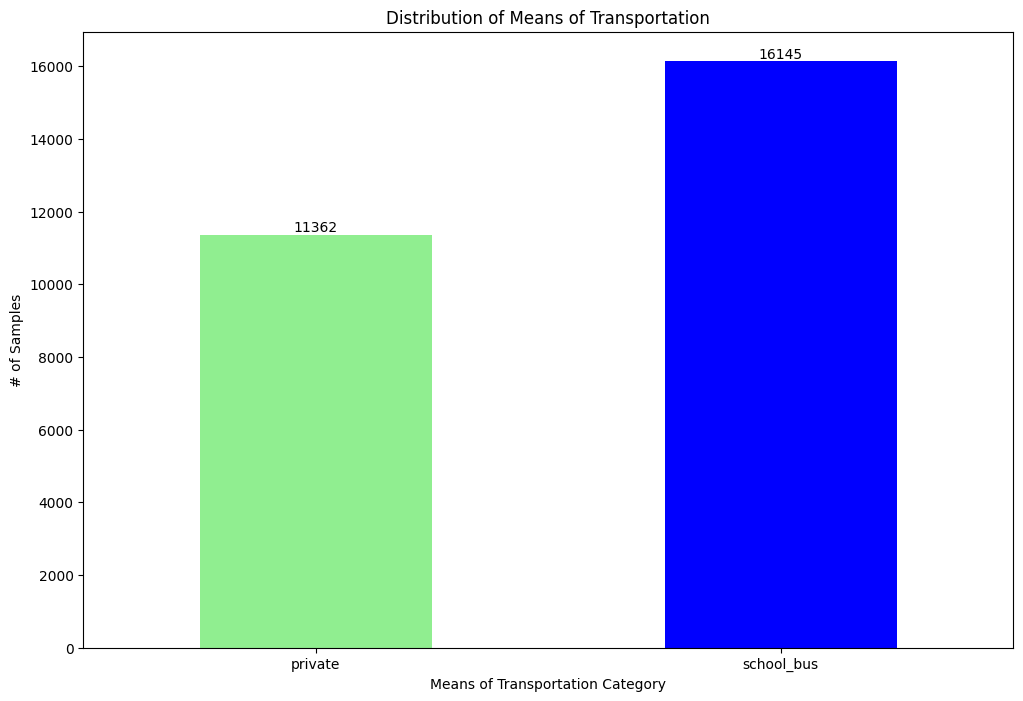

In [17]:
barplot_visual(data["transportation_means"],
               "Distribution of Means of Transportation",
               "Means of Transportation Category",
               "# of Samples",
               )

#### Dataset Visualization: Weekly Study Hours

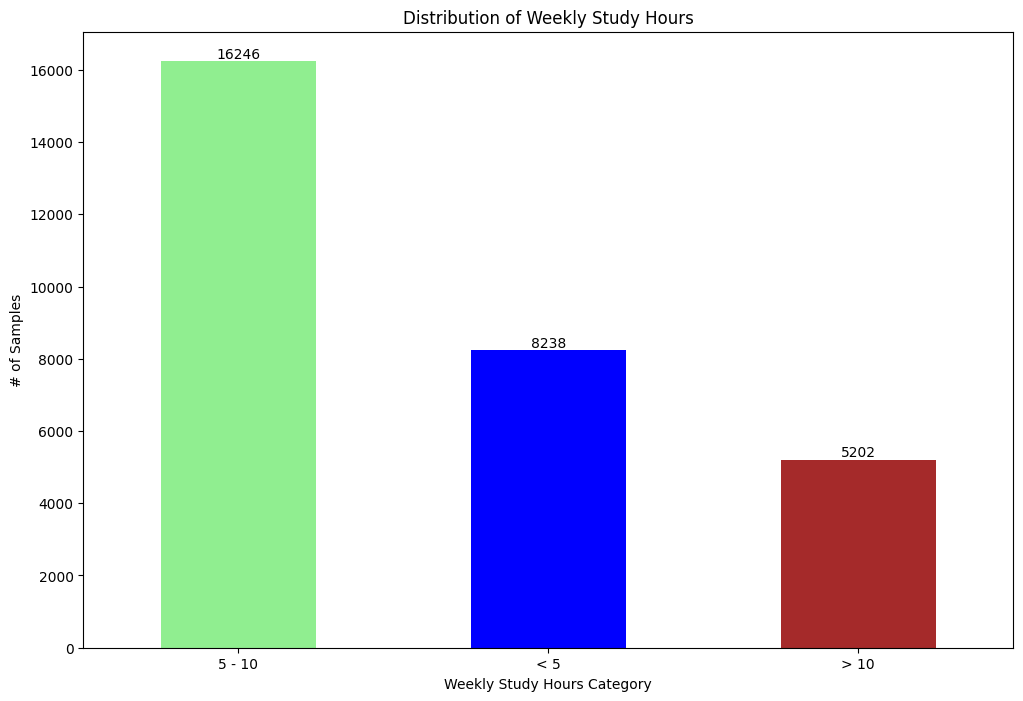

In [18]:
barplot_visual(data["weekly_study_hrs"],
               "Distribution of Weekly Study Hours",
               "Weekly Study Hours Category",
               "# of Samples",
               )

#### Create Function to Visualize Features (Histograms)

In [19]:
def histogram_visual(feature_to_visualize: pd.Series,
                     num_of_bins: int,
                     plot_title: str,
                     x_label: str,
                     x_start: float = -1.0,
                     y_label: str = "# of Samples",
                     min_value: float = 0,
                     max_value: float or int = 1
                     ):
    """
    This function returns a histogram for a feature.

    Inputs:
    - feature_to_visualize: Feature to plot in the form
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - x_start: To force the x-axis of the visual to start at
    a specified value instead of the automatically generated
    value, assign the float value here. Otherwise, the
    autogenerated start value will be used.
    - y_label: The string label value for the y label.
    - min_value: The minimum value in the Series for the purposes
        of creating a vertical line in the graphic.
    - max_value: The maximum value in the Series for the purposes
        of creating a vertical line in the graphic.

    Output:
    - A histogram.
    """

    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert type(x_start) != 'float', \
        "The x_start value must be a float value."
    assert type(min_value) != 'float' or type(min_value) != 'int', \
        "The min_value value must be either a float or an integer value."
    assert  type(max_value) != 'float' or type(max_value) != 'int', \
        "The max_value value must be either a float or an integer value."

    ax = feature_to_visualize.hist(grid=False,
                                   bins=num_of_bins,
                                   figsize=(18, 8))
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    plt.axvline(x = min_value,
                color = 'r',
                linewidth = "5",
                linestyle= 'dashed',
                label = 'axvline - full height')

    plt.axvline(x = max_value,
                color = 'r',
                linewidth = "5",
                linestyle= 'dashed',
                label = 'axvline - full height')

    if x_start != -1:
        plt.xlim([0, (max(feature_to_visualize) + (1/num_of_bins))])

    plt.show()

#### Dataset Visualization: Math Scores

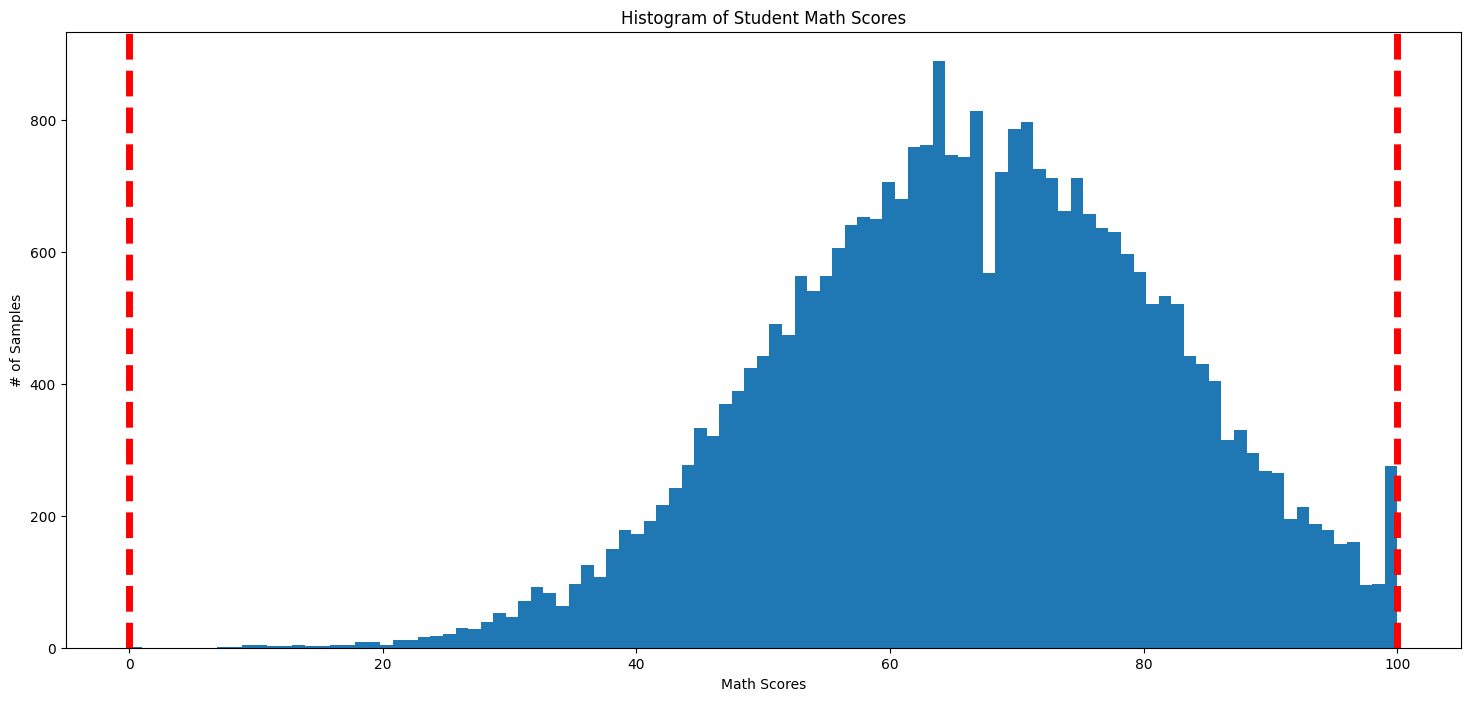

Math scores range from 0 to 100.


In [20]:
histogram_visual(data['math_score'],
                 num_of_bins=101,
                 plot_title="Histogram of Student Math Scores",
                 x_label="Math Scores",
                 min_value=min(data['math_score']),
                 max_value=max(data['math_score']))

print(f"Math scores range from " +
      f"{min(data['math_score'])} to" +
      f" {max(data['math_score'])}.")

#### Dataset Visualization: Reading Scores

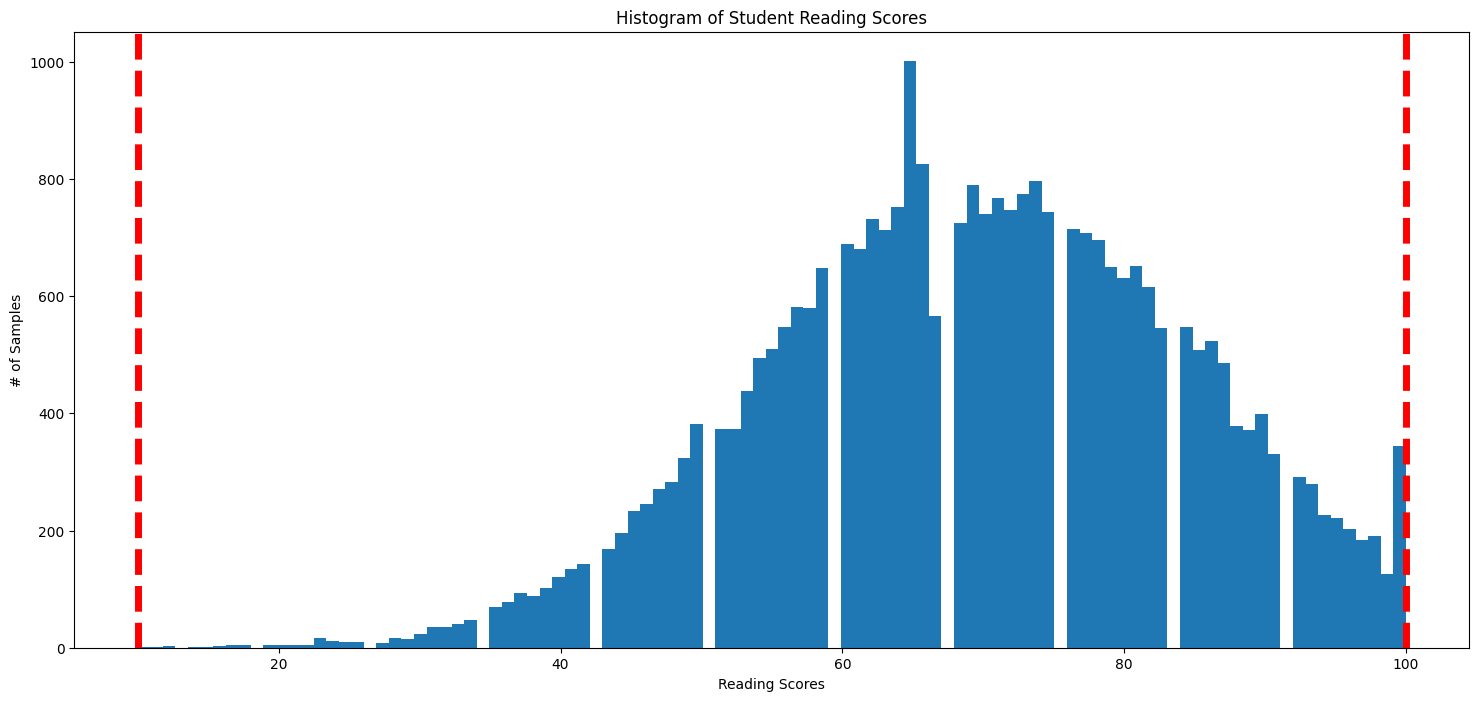

Reading scores range from 10 to 100.


In [21]:
histogram_visual(data['reading_score'],
                 num_of_bins=101,
                 plot_title="Histogram of Student Reading Scores",
                 x_label="Reading Scores",
                 min_value=min(data['reading_score']),
                 max_value=max(data['reading_score']))

print(f"Reading scores range from " +
      f"{min(data['reading_score'])} to" +
      f" {max(data['reading_score'])}.")

#### Dataset Visualization: Writing Scores

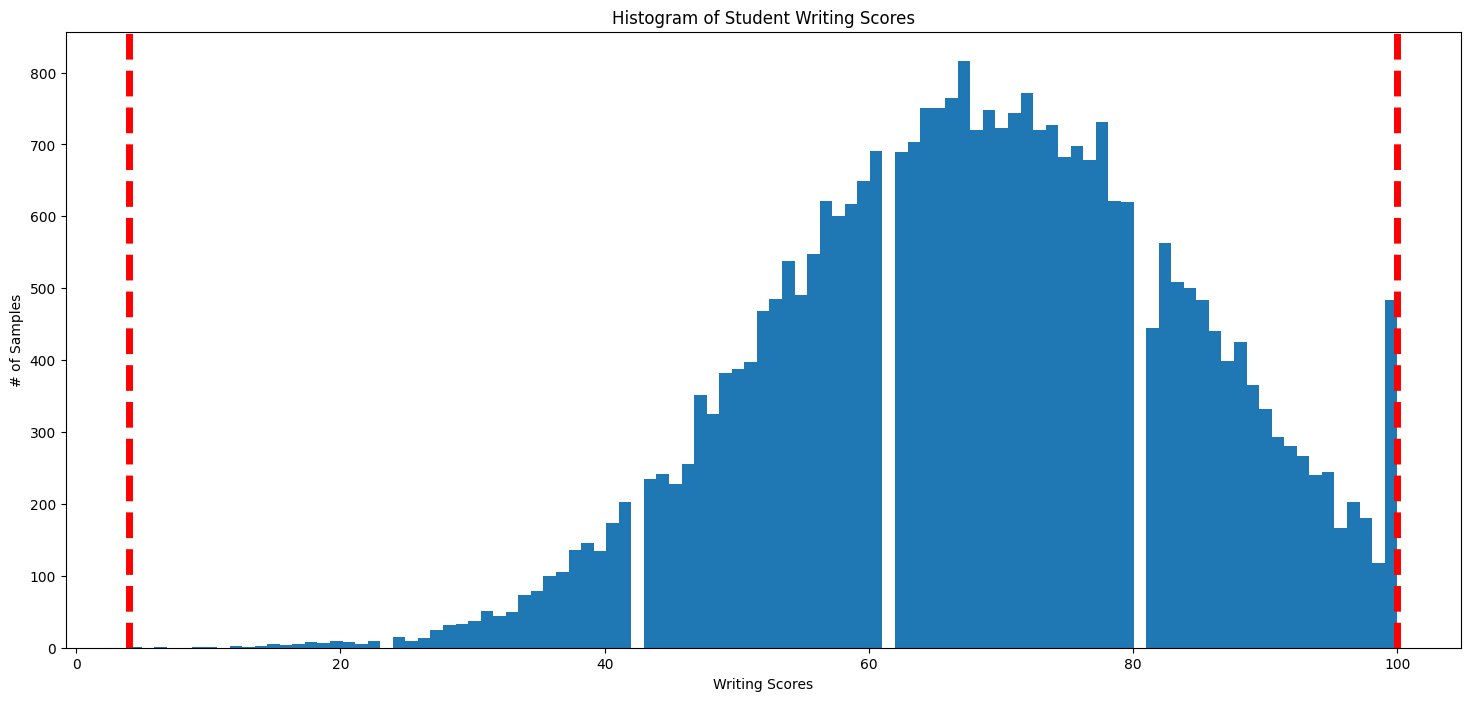

Writing scores range from 4 to 100.


In [22]:
histogram_visual(data['writing_score'],
                 num_of_bins=101,
                 plot_title="Histogram of Student Writing Scores",
                 x_label="Writing Scores",
                 min_value=min(data['writing_score']),
                 max_value=max(data['writing_score']))

print(f"Writing scores range from " +
      f"{min(data['writing_score'])} to" +
      f" {max(data['writing_score'])}.")

### Exploratory Data Analysis & Preprocessing

#### Descriptive Statistics

In [23]:
data.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99], include='all')

,gender,ethnicity,parent_edu,lunch_type,test_prep,parent_marital_status,practice_sport,is_first_child,sibling_count,transportation_means,weekly_study_hrs,math_score,reading_score,writing_score
count,30641,28801,28796,30641,28811,29451,30010,29737,29069.000000,27507,29686,30641.000000,30641.000000,30641.000000
unique,2,5,6,2,2,4,3,2,NaN,2,3,NaN,NaN,NaN
top,female,group C,some college,standard,none,married,sometimes,yes,NaN,school_bus,5 - 10,NaN,NaN,NaN
freq,15424,9212,6633,19905,18856,16844,15213,19082,NaN,16145,16246,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.145894,NaN,NaN,66.558402,69.377533,68.418622
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.458242,NaN,NaN,15.361616,14.758952,15.443525
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,10.000000,4.000000
1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,30.000000,35.000000,32.000000
10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,47.000000,50.000000,48.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,56.000000,59.000000,58.000000


### Prepare Shared Pipeline Data & Stages/Steps

#### Split Dataset into Training & Testing Datasets

In [24]:
data = data.rename(columns={"writing_score": "target"})

y = data['target']
X = data.drop(columns=['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"Training Input Dataset Shape: {X_train.shape}")
print(f"Training Output Dataset Shape: {y_train.shape}")

print(f"Evaluation Input Dataset Shape: {X_test.shape}")
print(f"Evaluation Output Dataset Shape: {y_test.shape}")

Training Input Dataset Shape: (22980, 13)
Training Output Dataset Shape: (22980,)
Evaluation Input Dataset Shape: (7661, 13)
Evaluation Output Dataset Shape: (7661,)


#### Metrics Evaluation Method

In [25]:
def regression_eval(model_name: str,
                    y_test: tuple(),
                    predictions: tuple(),
                    ) -> None:
    '''
    Calculate & display metrics for a regression analysis.
    '''
    regression_metric_names = (mean_squared_error,
                           mean_absolute_error,
                           median_absolute_error
                           )

    metrics_titles = ("Mean Squared Error",
                      "Mean Absolute Error",
                      "Median Absolute Error"
                      )

    print("+--------------------------------------------------+")
    print("|  " + model_name.center(46) + "  |")
    print("+--------------------------------------------------+")
    print("|  %s  |  %s   | " % ("Metric".rjust(29), "Value".ljust(11)))
    print("+--------------------------------------------------+")
    for x in range(len(regression_metric_names)):

        metric_name = regression_metric_names[x]

        score = metric_name(y_test, predictions)

        print("| %s  |  %s   |" % (metrics_titles[x].rjust(30),
                                   str(round(score, 3)).ljust(11)))
        print("+--------------------------------------------------+")

    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    print("|  %s  |  %s   | " % ("Root Mean Squared Error".rjust(29),
                                 str(round(rmse, 3)).ljust(11)))

    print("+--------------------------------------------------+")

### Auto-Sklearn Regression

#### Define Pipeline/Model

In [26]:
auto_sklearn_reg = AutoSklearnRegressor()

#### Fit Auto-Sklearn Classifier to Dataset

In [27]:
auto_sklearn_model = auto_sklearn_reg.fit(X_train, y_train)

#### Generate Predictions

In [28]:
predictions = auto_sklearn_model.predict(X_test)

#### Metrics Evaluation

In [29]:
regression_eval("Auto-Sklearn",
                       y_test,
                       predictions)

+--------------------------------------------------+
|                   Auto-Sklearn                   |
+--------------------------------------------------+
|                         Metric  |  Value         | 
+--------------------------------------------------+
|             Mean Squared Error  |  13.43         |
+--------------------------------------------------+
|            Mean Absolute Error  |  2.915         |
+--------------------------------------------------+
|          Median Absolute Error  |  2.462         |
+--------------------------------------------------+
|        Root Mean Squared Error  |  3.665         | 
+--------------------------------------------------+


### Notes & Other Takeaways From This Project
****
- While the model was not as accurate (according to the metrics) as I would have liked, this model is superior to the other models I have seen online.

- In the real world, if the missing values were filled in with the actual data, I am sure that the results would improve.

- I have not seen all of them; I just purused a handful of the posted projects on Kaggle.

- Most of those projects at best had RMSE values of around 2.5-4 times as large as what my models for the student performance dataset achieved.
****

### Citations

- Auto-Sklearn
    > @inproceedings{feurer-neurips15a, title = {Efficient and Robust Automated Machine Learning}, author = {Feurer, Matthias and Klein, Aaron and Eggensperger, Katharina and Springenberg, Jost and Blum, Manuel and Hutter, Frank}, booktitle = {Advances in Neural Information Processing Systems 28 (2015)}, pages = {2962--2970}, year = {2015}}

    > @article{feurer-arxiv20a, title = {Auto-Sklearn 2.0: Hands-free AutoML via Meta-Learning}, author = {Feurer, Matthias and Eggensperger, Katharina and Falkner, Stefan and Lindauer, Marius and Hutter, Frank}, journal = {arXiv:2007.04074 [cs.LG]}, year = {2020},}